In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
#한글 입력 포함 각종 전처리
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [6, 4]})
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [6]:
pd.set_option('display.precision', 2)

In [7]:
!git clone https://github.com/sjunc/2025-1-BigData-Team

fatal: destination path '2025-1-BigData-Team' already exists and is not an empty directory.


단독주택_다가구_다중      48814
아파트             102649
다세대_연립           41527
오피스텔_원룸          23519
기타거주시설_기숙사 등     10439
                 ...  
군사기지_군사시설         2608
구금장소               720
사회복지시설            1296
기타              416854
미상              153844
Length: 62, dtype: int64


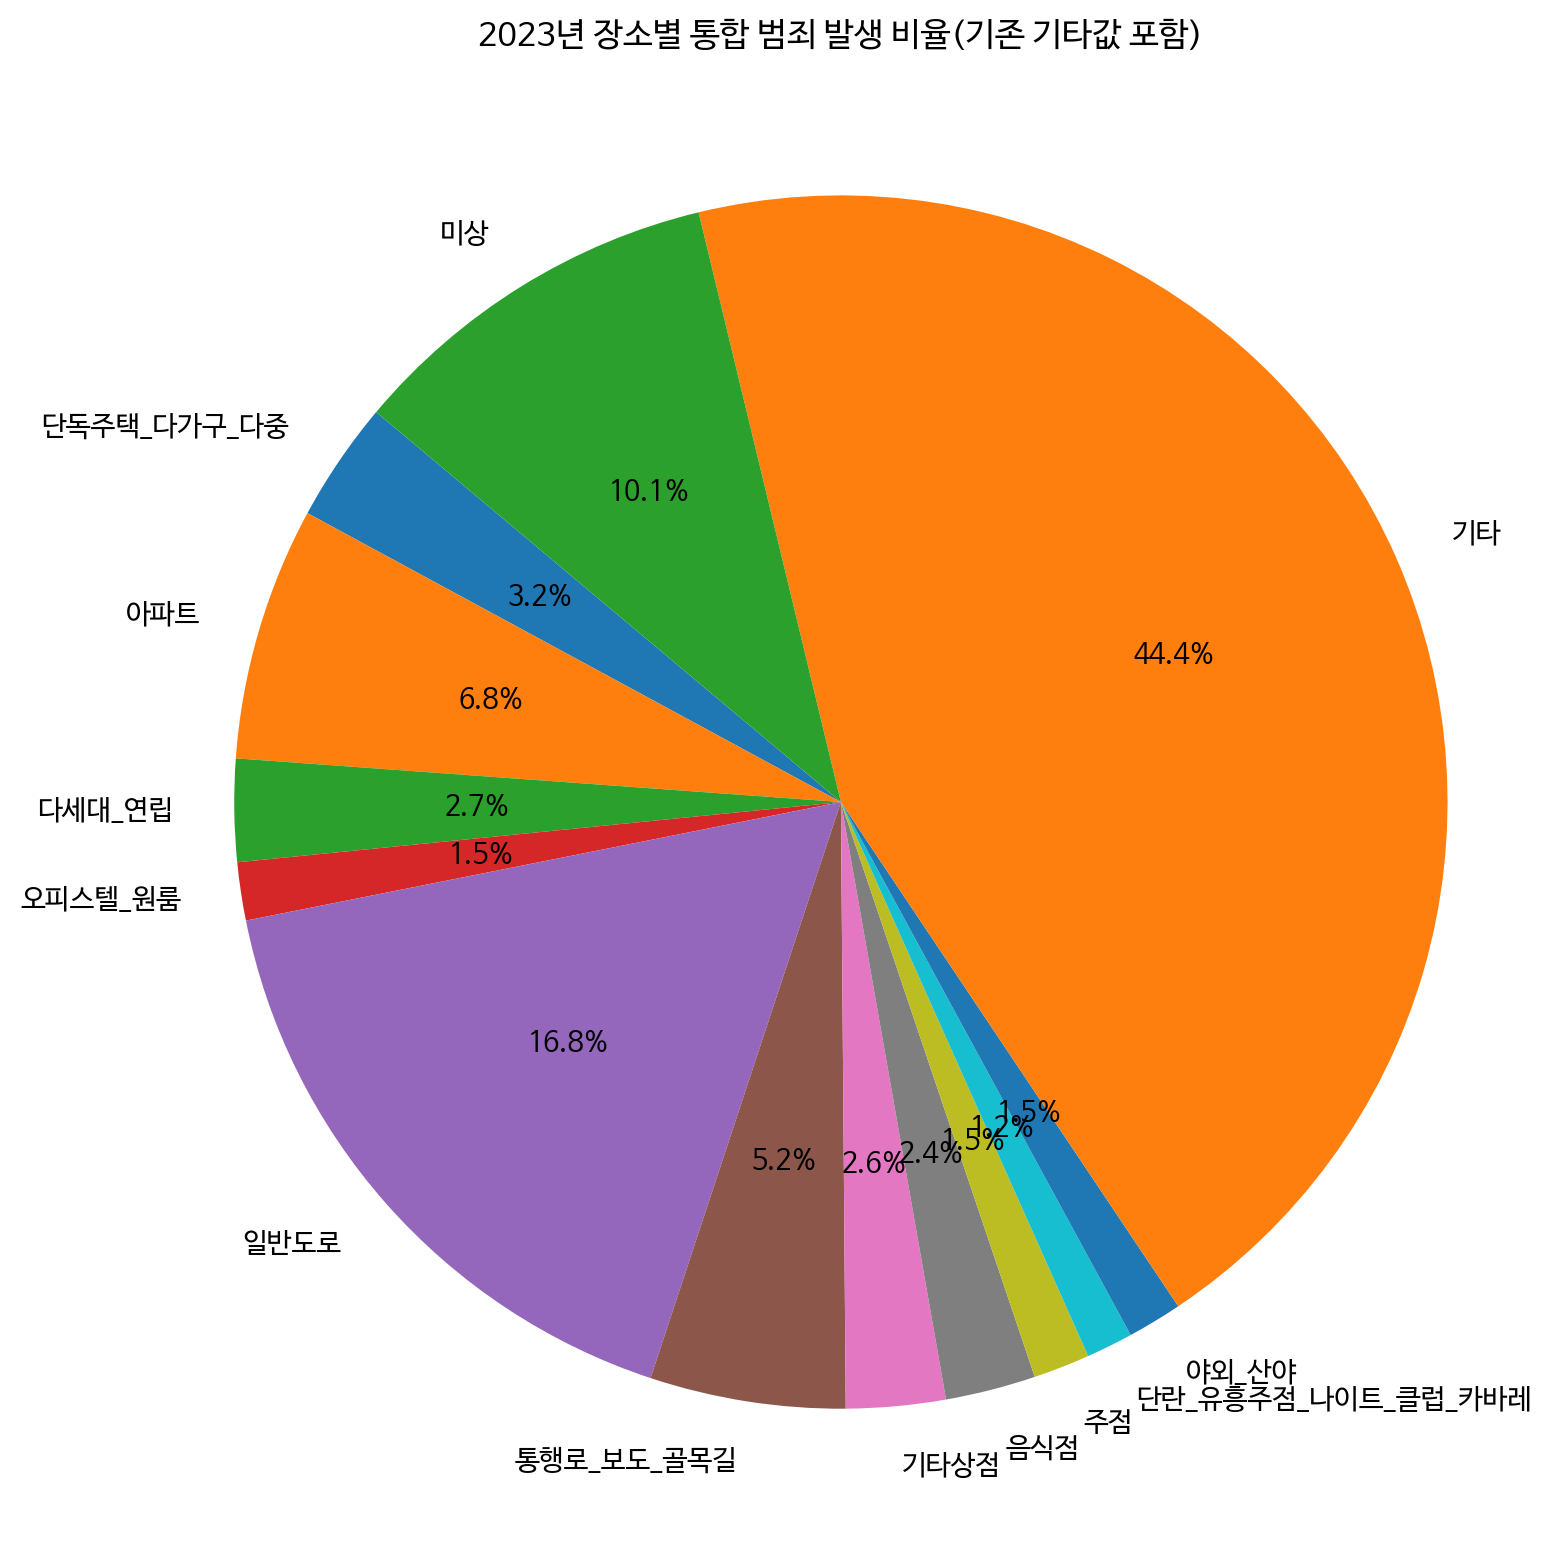

In [8]:
#colab에서 했더니 앞에 /content 경로를 붙여야만 파일이 불러와짐
file_path = '/content/2025-1-BigData-Team/CrimeData/범죄발생장소(2012~2023)/경찰청_범죄발생장소_2023.csv'
df = pd.read_csv(file_path, encoding='cp949')
df = df.drop(df.columns[0:2],axis=1)
summary = df.sum(axis='index')
print(summary)
total = summary.sum()
threshold = total * 0.012
low_ratio_idx = summary[summary < threshold].index
summary.loc['기타'] += summary[low_ratio_idx].sum()
summary = summary.drop(index=low_ratio_idx)
# 그래프
plt.figure(figsize=(8, 8))
plt.pie(summary, labels=summary.index, autopct='%1.1f%%', startangle=140)
plt.title('2023년 장소별 통합 범죄 발생 비율(기존 기타값 포함)')
plt.axis('equal')
plt.tight_layout()
plt.show()

기존 기타값을 포함할 시에는 기타 값에 포함되는 업종이 너무 많아지고 기타의 비중이 너무 커져 그래프가 보기 안좋아진다.

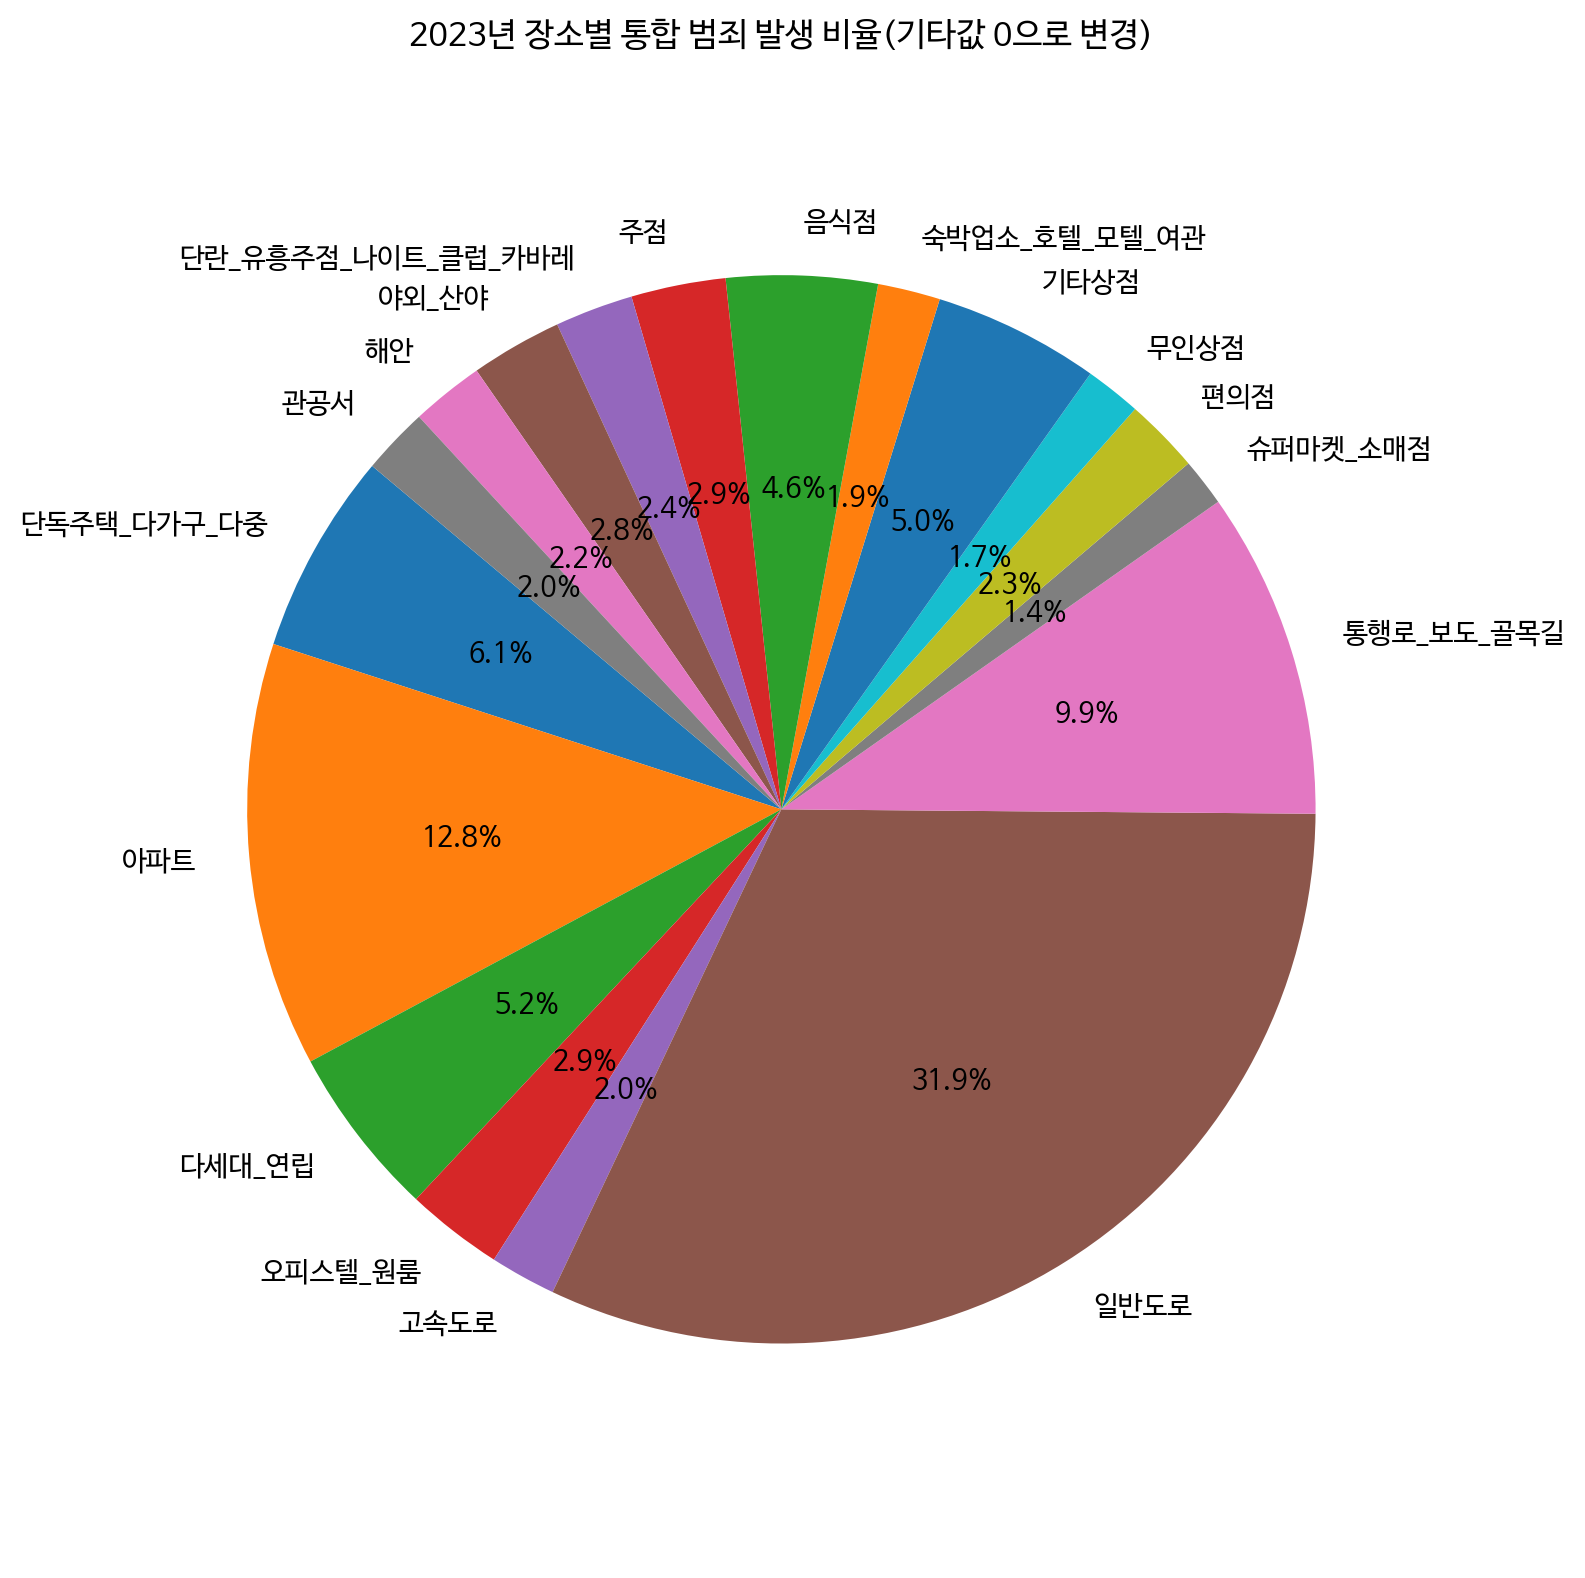

In [9]:
df = df.drop(df.columns[-2:],axis=1)
df = df.assign(기타=0)
summary = df.sum(axis='index')
total = summary.sum()
threshold = total * 0.012
low_ratio_idx = summary[summary < threshold].index
summary.loc['기타'] += summary[low_ratio_idx].sum()
summary = summary.drop(index=low_ratio_idx)
plt.figure(figsize=(8, 8))
plt.pie(summary, labels=summary.index, autopct='%1.1f%%', startangle=140)
plt.title('2023년 장소별 통합 범죄 발생 비율(기타값 0으로 변경)')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [10]:
file_path = '/content/2025-1-BigData-Team/CrimeData/범죄발생장소(2012~2023)/경찰청_범죄발생장소_2023.csv'
df = pd.read_csv(file_path, encoding='cp949')
df = df.drop(df.columns[0:2],axis=1)
df = df.drop(df.index[8:])
df = df.drop(df.columns[-2:],axis=1)
total = df.sum()

In [11]:
df

,단독주택_다가구_다중,아파트,다세대_연립,오피스텔_원룸,기타거주시설_기숙사 등,고속도로,자동차 전용도로,일반도로,통행로_보도_골목길,백화점,...,의료기관,종교시설,야외_산야,해안,폐가_공터,공중화장실,관공서,군사기지_군사시설,구금장소,사회복지시설
0,48,66,38,16,6,0,1,4,8,0,...,8,1,7,2,2,0,0,0,0,1
1,61,67,45,19,13,1,1,16,40,0,...,14,3,15,1,3,0,3,0,3,1
2,36,40,29,42,9,1,1,18,42,3,...,1,1,19,0,0,3,1,0,0,1
3,418,680,624,693,69,0,0,20,34,2,...,15,8,30,2,6,59,1,3,0,3
4,66,113,97,113,17,0,0,9,16,0,...,12,0,7,0,2,15,0,1,5,4
5,438,847,498,435,114,15,4,304,1363,34,...,317,30,229,9,13,63,70,53,44,45
6,18,31,28,16,4,0,0,0,2,0,...,0,1,2,0,0,3,0,1,0,2
7,202,215,161,51,35,1,0,25,71,0,...,10,7,33,0,17,7,13,0,1,6


In [12]:
total

,0
단독주택_다가구_다중,1287
아파트,2059
다세대_연립,1520
오피스텔_원룸,1385
기타거주시설_기숙사 등,267
고속도로,18
자동차 전용도로,7
일반도로,396
통행로_보도_골목길,1576
백화점,39


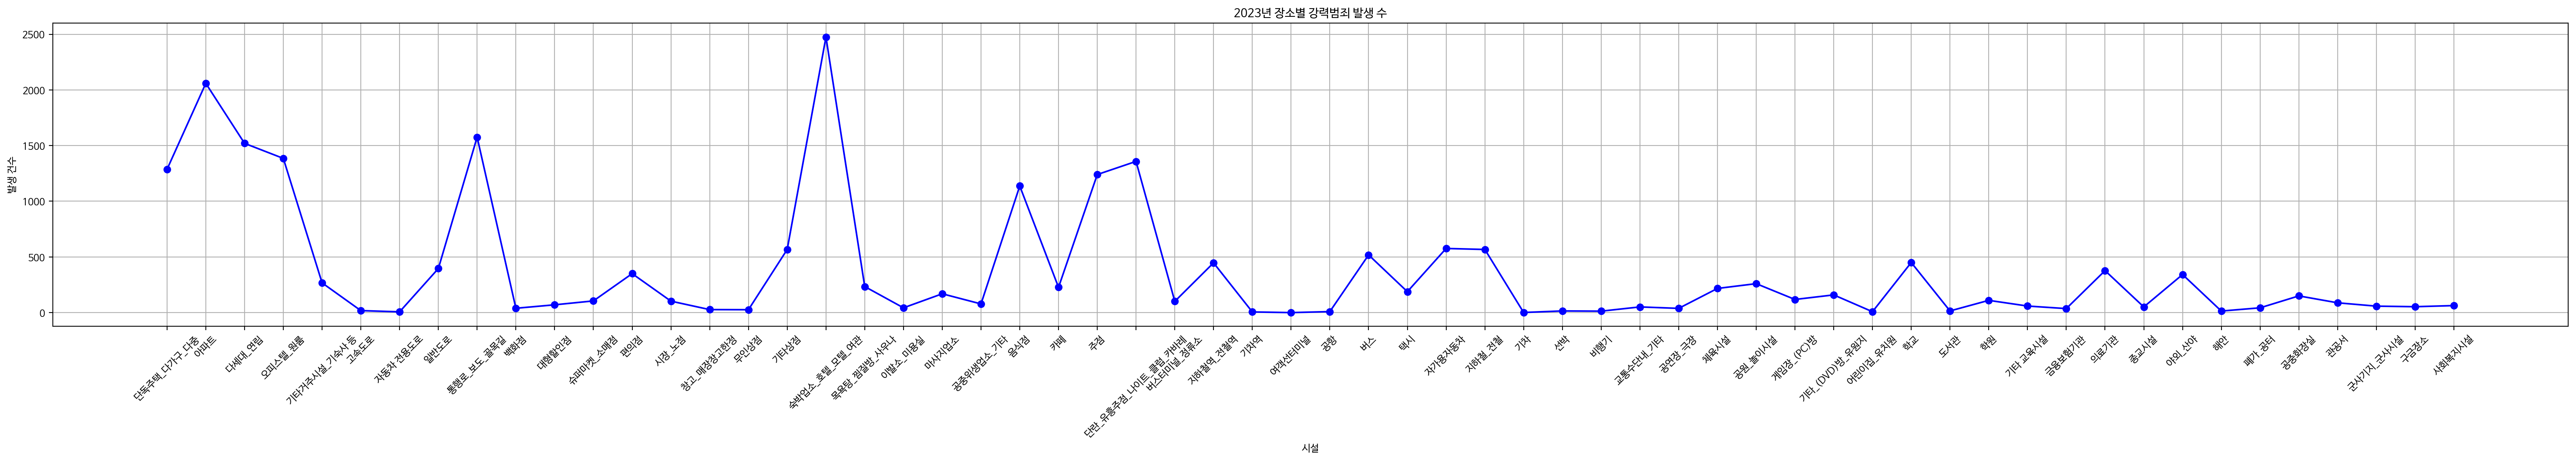

In [13]:
plt.rc('font', family='NanumBarunGothic', size = 9)
plt.figure(figsize=(33, 6))
plt.plot(total.index, total.values, marker='o', linestyle='-', color='blue')
plt.title('2023년 장소별 강력범죄 발생 수')
plt.xlabel('시설')
plt.ylabel('발생 건수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

절도,폭력범죄의 장소별 범죄 발생수

In [29]:
file_path = '/content/2025-1-BigData-Team/CrimeData/범죄발생장소(2012~2023)/경찰청_범죄발생장소_2023.csv'
df = pd.read_csv(file_path, encoding='cp949')
df = df.drop(df.columns[0:2],axis=1)
df = df.drop(df.index[:8])
df = df.drop(df.index[-21:])
df = df.drop(df.columns[-2:],axis=1)
df
total = df.sum()

In [30]:
total

,0
단독주택_다가구_다중,19038
아파트,48314
다세대_연립,20007
오피스텔_원룸,8957
기타거주시설_기숙사 등,2871
고속도로,684
자동차 전용도로,465
일반도로,25016
통행로_보도_골목길,45166
백화점,2685


<ipython-input-37-bd27c61772d3>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df,labels=total.index)


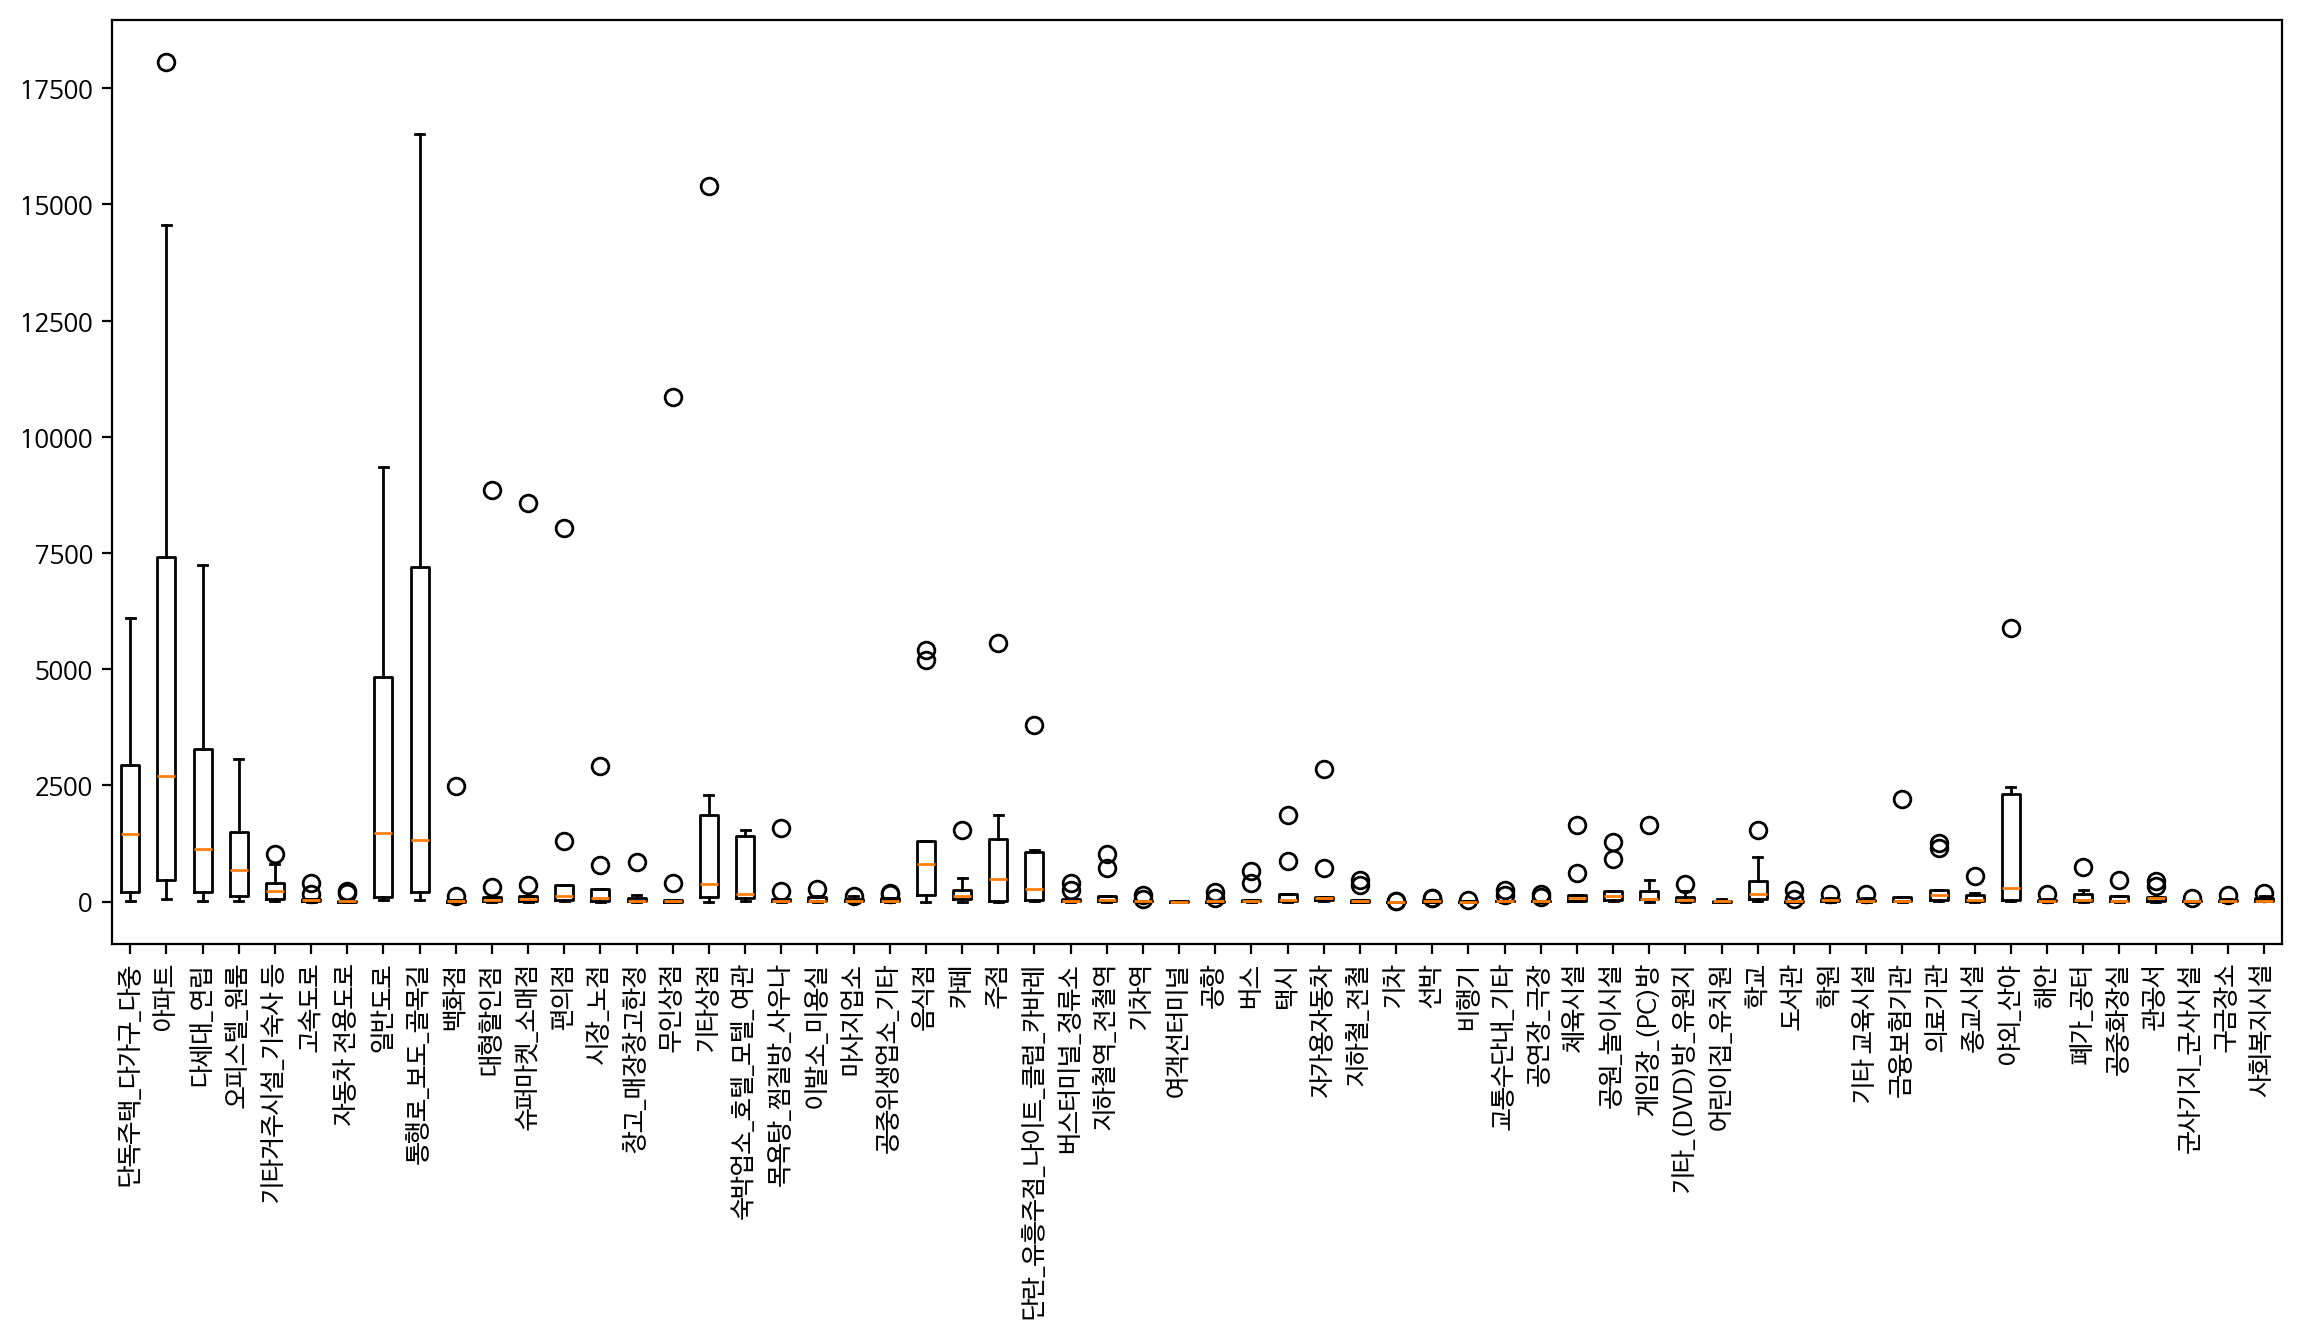

In [37]:
plt.figure(figsize=(14, 6))
plt.boxplot(df,labels=total.index)
plt.xticks(rotation=90)
plt.show()

비싼 물품이 많은 업종의 장소에서
폭행,절도범죄가 많이 일어날것으로 예상했으나
유동인구 혹은 사람이 많이 있는 곳에서 압도적으로 많은 수의
폭행,절도범죄가 일어나는 것으로 보인다.